<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-Dependence" data-toc-modified-id="Install-Dependence-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install Dependence</a></span><ul class="toc-item"><li><span><a href="#Install-XLA" data-toc-modified-id="Install-XLA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Install XLA</a></span></li><li><span><a href="#Pytorch-Lightning" data-toc-modified-id="Pytorch-Lightning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pytorch Lightning</a></span></li></ul></li><li><span><a href="#Import-Library" data-toc-modified-id="Import-Library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Library</a></span></li><li><span><a href="#Show-Version" data-toc-modified-id="Show-Version-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Show Version</a></span></li><li><span><a href="#Global-Constants" data-toc-modified-id="Global-Constants-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Global Constants</a></span></li><li><span><a href="#Random-Seed" data-toc-modified-id="Random-Seed-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random Seed</a></span></li><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Create-Records-Index" data-toc-modified-id="Create-Records-Index-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Create Records Index</a></span></li><li><span><a href="#Train-and-Valid-Data" data-toc-modified-id="Train-and-Valid-Data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Train and Valid Data</a></span></li><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Test Data</a></span></li></ul></li><li><span><a href="#Sample-Data-Exploration" data-toc-modified-id="Sample-Data-Exploration-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Sample Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Demo--Image" data-toc-modified-id="Demo--Image-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Demo  Image</a></span></li><li><span><a href="#Define-Display-Image-Method" data-toc-modified-id="Define-Display-Image-Method-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Define Display Image Method</a></span></li><li><span><a href="#Display-Raw-Sample-Images" data-toc-modified-id="Display-Raw-Sample-Images-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Display Raw Sample Images</a></span></li><li><span><a href="#Data-Augment-Transform" data-toc-modified-id="Data-Augment-Transform-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Data Augment Transform</a></span></li><li><span><a href="#Display-Augment-Images" data-toc-modified-id="Display-Augment-Images-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Display Augment Images</a></span></li></ul></li><li><span><a href="#Build-Network" data-toc-modified-id="Build-Network-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Build Network</a></span><ul class="toc-item"><li><span><a href="#Load-Pretrained-Model" data-toc-modified-id="Load-Pretrained-Model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Load Pretrained Model</a></span></li><li><span><a href="#Freezing-Partial-Layers" data-toc-modified-id="Freezing-Partial-Layers-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Freezing Partial Layers</a></span></li><li><span><a href="#Model/-Loss/Optimizer" data-toc-modified-id="Model/-Loss/Optimizer-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Model/ Loss/Optimizer</a></span></li></ul></li><li><span><a href="#Train" data-toc-modified-id="Train-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Predict" data-toc-modified-id="Predict-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#Plot-Metrics" data-toc-modified-id="Plot-Metrics-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Plot Metrics</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

In [1]:
! [ ! -L /kaggle ] && ln -s /data/kaggle /kaggle 

##  Install Dependence

### Install XLA

In [ ]:
# !pip uninstall -y torch torchvision 

In [ ]:
# file_url = 'https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py'
# !curl {file_url} -o pytorch-xla-env-setup.py
# !python pytorch-xla-env-setup.py --version 20200529 --apt-packages libomp5 libopenblas-dev

[torch-fix: 20200528](https://github.com/pytorch/pytorch/commit/3d2fce6bc39c7cfa2872a43773da74e0da79757a#diff-724910f4a1ffa1852a02e149b181ac22)

### Pytorch Lightning

In [3]:
# !pip install pytorch_lightning

In [4]:
# !pip install tfrecord

## Import Library

In [51]:
import os
import io
import random
import glob
import pytorch_lightning as pl
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torchvision
import matplotlib.pyplot as plt

from torch import nn
from torch.nn import functional as F
from torch.utils.data import (Dataset, DataLoader)
from torchvision.transforms import (
        Resize,
        Compose,
        ToTensor,
        Normalize,
        RandomOrder,
        ColorJitter,
        RandomRotation,
        RandomGrayscale,
        RandomResizedCrop,
        RandomVerticalFlip,
        RandomHorizontalFlip)

from PIL import Image, ImageDraw, ImageFont

# from torchsummary import summary
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint

from tfrecord import reader
from tfrecord.tools.tfrecord2idx import create_index

%matplotlib inline

sns.set(style='white', font_scale=1.2)

## Show Version

In [52]:
np.__version__, pd.__version__, sns.__version__

('1.18.5', '1.0.4', '0.10.1')

In [53]:
torch.__version__, torchvision.__version__, pl.__version__

('1.6.0.dev20200609+cu101', '0.7.0.dev20200609+cu101', '0.9.0')

## Global Constants

In [54]:
RNG_SEED = 9527
DATA_ROOT = '/kaggle/input/tpu-getting-started'
WORK_ROOT = '/kaggle/working/tpu-getting-started'
CKPT_PATH = f'{WORK_ROOT}/checkpoints/best.ckpt'
SUBMITCSV = '/kaggle/working/submission.csv'
FONT_PATH = '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf'

INPUT_SIZE = 192
BATCH_SIZE = 48
NUM_WORKERS = 1

MAX_EPOCHS = 30

DATASET_MEAN = (0.5, 0.5, 0.5)
DATASET_STD = (0.5, 0.5, 0.5)

CLASS_NAMES = [
    'pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 
    'wild geranium', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 
    'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 
    'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 
    'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 
    'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 
    'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 
    'carnation', 'garden phlox', 'love in the mist', 'cosmos',  'alpine sea holly', 
    'ruby-lipped cattleya', 'cape flower', 'great masterwort',  'siam tulip', 
    'lenten rose', 'barberton daisy', 'daffodil',  'sword lily', 'poinsettia', 
    'bolero deep blue',  'wallflower', 'marigold', 'buttercup', 'daisy', 
    'common dandelion', 'petunia', 'wild pansy', 'primula',  'sunflower', 
    'lilac hibiscus', 'bishop of llandaff', 'gaura',  'geranium', 'orange dahlia', 
    'pink-yellow dahlia', 'cautleya spicata',  'japanese anemone', 'black-eyed susan', 
    'silverbush', 'californian poppy',  'osteospermum', 'spring crocus', 'iris', 
    'windflower',  'tree poppy', 'gazania', 'azalea', 'water lily',  'rose', 
    'thorn apple', 'morning glory', 'passion flower',  'lotus', 'toad lily', 
    'anthurium', 'frangipani',  'clematis', 'hibiscus', 'columbine', 'desert-rose', 
    'tree mallow', 'magnolia', 'cyclamen ', 'watercress',  'canna lily', 
    'hippeastrum ', 'bee balm', 'pink quill',  'foxglove', 'bougainvillea', 
    'camellia', 'mallow',  'mexican petunia',  'bromelia', 'blanket flower', 
    'trumpet creeper',  'blackberry lily', 'common tulip', 'wild rose']

NUM_CLASSES = len(CLASS_NAMES)

In [55]:
!ls -l $DATA_ROOT
!mkdir -p $WORK_ROOT

total 4
drwxrwxr-x 5 1002 1002 4096 Sep 24 15:42 tfrecords-jpeg-192x192


## Random Seed

In [56]:
torch.manual_seed(RNG_SEED)
np.random.seed(RNG_SEED)
random.seed(RNG_SEED)

# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

## Prepare Data

In [57]:
IMG_SCALE = 'tfrecords-jpeg-{}x{}'.format(INPUT_SIZE, INPUT_SIZE)
train_files = glob.glob(f'{DATA_ROOT}/{IMG_SCALE}/train/*.tfrec')
valid_files = glob.glob(f'{DATA_ROOT}/{IMG_SCALE}/val/*.tfrec')
test_files = glob.glob(f'{DATA_ROOT}/{IMG_SCALE}/test/*.tfrec')
print('Files:', \
      '\n\tTrain tfrec Count:', len(train_files), \
      '\n\tValid tfrec Count:', len(valid_files), \
      '\n\tTest  tfrec Count:', len(test_files))

Files: 
	Train tfrec Count: 16 
	Valid tfrec Count: 16 
	Test  tfrec Count: 16


### Create Records Index

In [58]:
def create_indexes(phase):
    tfrec_files = glob.glob(f'{DATA_ROOT}/{IMG_SCALE}/{phase}/*.tfrec')
    dirpath = os.path.dirname(tfrec_files[0].replace(DATA_ROOT, WORK_ROOT))
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
    patterns = []
    for tfrec_path in tfrec_files:  
        index_path = tfrec_path.replace(DATA_ROOT, WORK_ROOT).replace('.tfrec', '.index')
        create_index(tfrec_path, index_path)
        patterns.append(tfrec_path[len(DATA_ROOT)+1:-6])
    return patterns
        
train_patterns = create_indexes('train')
valid_patterns = create_indexes('val')
test_patterns  = create_indexes('test')

In [59]:
train_patterns[:5]

['tfrecords-jpeg-192x192/train/03-192x192-798',
 'tfrecords-jpeg-192x192/train/15-192x192-783',
 'tfrecords-jpeg-192x192/train/11-192x192-798',
 'tfrecords-jpeg-192x192/train/08-192x192-798',
 'tfrecords-jpeg-192x192/train/04-192x192-798']

In [60]:
class TFRecordFlowersDataset(torch.utils.data.IterableDataset):
    def __init__(self, patterns, labeled=True, augtrans=None, imgtrans=None):
        super().__init__()
        self.labeled = labeled
        self.augtrans = augtrans
        self.imgtrans = imgtrans 
        self.imagecnt = 0
        self.imagepat = []
        for pattern in patterns:
            tfrec_path = DATA_ROOT + f'/{pattern}.tfrec'
            index_path = WORK_ROOT + f'/{pattern}.index'
            self.imagecnt += len(np.loadtxt(index_path, dtype=np.int64)[:, 0])
            self.imagepat.append((tfrec_path, index_path))
        print('Count:', self.imagecnt)

    def __iter__(self):
        worker_info = torch.utils.data.get_worker_info()
        if worker_info is not None:
            shard = worker_info.id, worker_info.num_workers
            np.random.seed(worker_info.seed % np.iinfo(np.uint32).max)
        else:
            shard = None
            
        if self.labeled:
            description = {'image': 'byte', 'class': 'int'}
        else:
            description = {'image': 'byte', 'id': 'byte'}
            
        for tfrec_path, index_path in self.imagepat:
            it = reader.tfrecord_loader(
                tfrec_path,
                index_path,
                description,
                shard
            )
            for elem in it:
                img = Image.open(io.BytesIO(elem['image']), mode='r').convert('RGB')
                if self.augtrans:
                    img = self.augtrans(img)
                if self.imgtrans:
                    img = self.imgtrans(img)
                tag = elem['class'].item() if self.labeled else str(elem['id'], encoding='utf-8')
                yield img, tag
                
    def __len__(self):
        return self.imagecnt

### Train and Valid Data

In [15]:
# train_dataset = TFRecordFlowersDataset(train_patterns)
# valid_dataset = TFRecordFlowersDataset(valid_patterns)

### Test Data

In [16]:
# test_dataset = TFRecordFlowersDataset(test_patterns, labeled=False)

## Sample Data Exploration

### Demo  Image

In [61]:
sample_dataset = TFRecordFlowersDataset(train_patterns)
sample_iter = iter(sample_dataset)
sample_data = [next(sample_iter) for _ in range(10)]
sample_dataloader = DataLoader(sample_dataset, batch_size=32, shuffle=False)
sample_data[0], len(sample_dataloader)

Count: 12753


((<PIL.Image.Image image mode=RGB size=192x192 at 0x7F5182419748>, 49), 399)

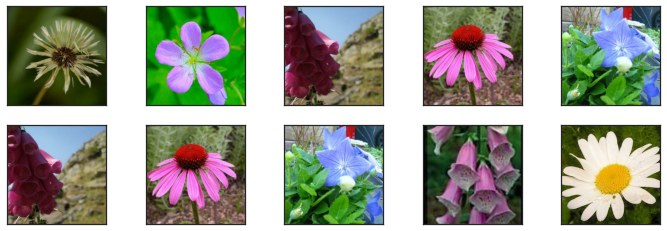

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=5, sharey=True, figsize=(12,4))
for r in range(2):
    for c in range(5):
        axes[r][c].set_xticks([])
        axes[r][c].set_yticks([])
        axes[r][c].imshow(np.array(sample_data[r*2 + c][0]).astype('uint8')) # 'gray_r'

### Define Display Image Method

In [63]:
def draw_image(imgdata, labelname, augtrans=None):
    img = imgdata.copy()
    if augtrans is not None:
        img = augtrans(img)
        
    font_obj = ImageFont.truetype(FONT_PATH, 16)
    draw_img = ImageDraw.Draw(img)
    draw_img.text((0, 0), labelname, font=font_obj, fill=(255, 255, 255))
    return np.array(img)

def grid_image(imgs_list, cols=5):
    images = torch.as_tensor(imgs_list) # [(W, H, C)...] to (B, H, W, C)
    images = images.permute(0, 3, 1, 2) # (B, H, W, C) to (B, C, H, W)
    images = torchvision.utils.make_grid(images, nrow=cols) # (C, 2*H, 4*W)
    images = images.permute(1, 2, 0) # (H, W, C)
    return images

### Display Raw Sample Images

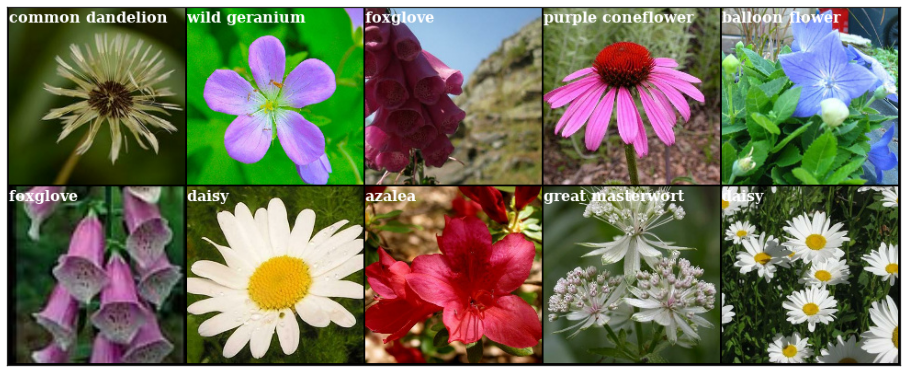

In [64]:
plt.figure(figsize=(16, 8))

images_2x5 = [
    draw_image(
        imgdata=img,
        labelname=CLASS_NAMES[labelid],
    ) for img, labelid in sample_data
]

plt.xticks([])
plt.yticks([])
plt.imshow(grid_image(images_2x5, cols=5));

### Data Augment Transform

In [65]:
aug_trans = RandomOrder([
    RandomRotation(degrees=30),
    RandomVerticalFlip(p=0.3),
    RandomHorizontalFlip(p=0.3),
    ColorJitter(brightness=0.55, contrast=0.3, saturation=0.25, hue=0),
])

img_trans = Compose([
    RandomResizedCrop((224, 224)),
    ToTensor(),
    Normalize(mean=DATASET_MEAN, std=DATASET_STD),
])

### Display Augment Images

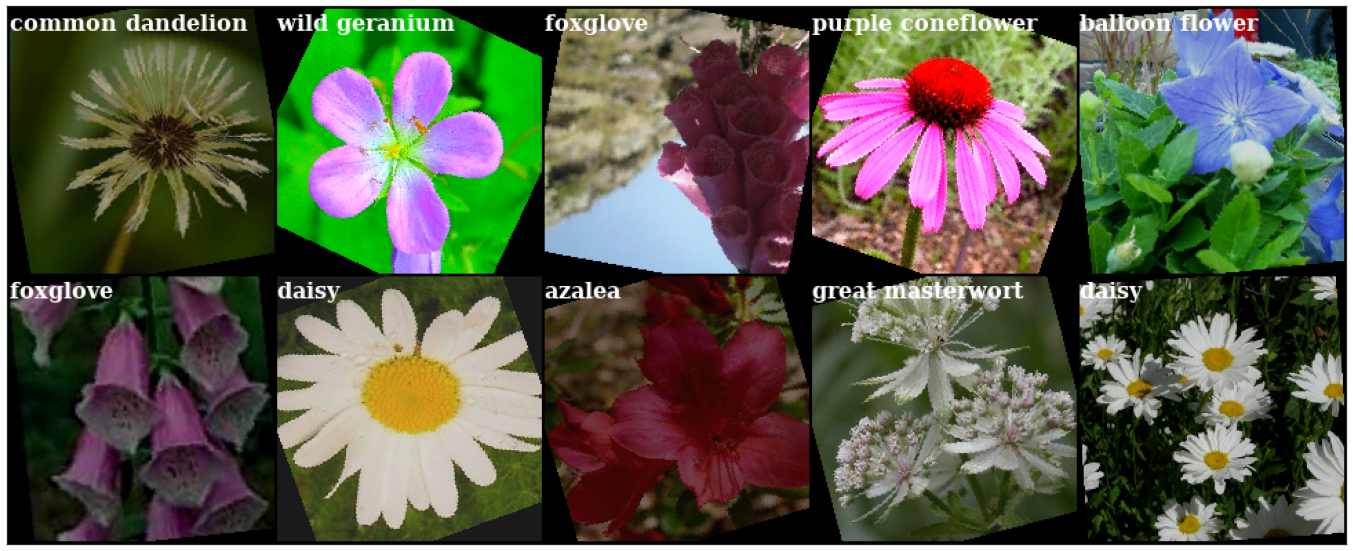

In [66]:
plt.figure(figsize=(24, 12))

augment_images_2x5 = [
    draw_image(
        imgdata=img,
        labelname=CLASS_NAMES[labelid],
        augtrans = aug_trans
    ) for img, labelid in sample_data
]

plt.xticks([])
plt.yticks([])
plt.imshow(grid_image(augment_images_2x5, cols=5));

In [67]:
del sample_dataloader
del sample_dataset
del sample_data

## Build Network

### Load Pretrained Model

In [68]:
backbone = torchvision.models.vgg16_bn(pretrained=True)

In [25]:
# backbone

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [26]:
# summary(backbone, (3, INPUT_SIZE, INPUT_SIZE), device='cpu')

### Freezing Partial Layers

In [69]:
for param in backbone.features.parameters():
    param.requires_grad = False

### Model/ Loss/Optimizer 

In [70]:
class ClassifierNet(pl.LightningModule):
    def __init__(self, extractor=None, num_classes=NUM_CLASSES):
        super().__init__()
        if extractor is not None:
            self.features = extractor
            self.classifier = nn.Sequential(
                nn.AdaptiveAvgPool2d(output_size=(7, 7)),
                nn.Flatten(start_dim=1, end_dim=-1),
                nn.Linear(in_features=25088, out_features=2048, bias=True),
                nn.ReLU(inplace=True),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(in_features=2048, out_features=1024, bias=True),
                nn.ReLU(inplace=True),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(in_features=1024, out_features=256, bias=True),
                nn.ReLU(inplace=True),
                # nn.Dropout(p=0.5, inplace=False),
                nn.Linear(in_features=256, out_features=num_classes, bias=True)
            )
        else:    
            self.features = nn.Sequential(
                nn.BatchNorm2d(num_features=3, momentum=0.1, affine=True, track_running_stats=True),
                nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=1, dilation=1, groups=1, bias=True),
                nn.ReLU(inplace=True),
                nn.BatchNorm2d(num_features=64, momentum=0.1, affine=True, track_running_stats=True),
                nn.MaxPool2d(kernel_size=7, stride=1, padding=3, ceil_mode=False),
                nn.Dropout(inplace=True, p=0.5),
                nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, stride=2, padding=2, dilation=1, groups=1, bias=True),
                nn.ReLU(inplace=True),
                nn.BatchNorm2d(num_features=64, momentum=0.1, affine=True, track_running_stats=True),
                nn.MaxPool2d(kernel_size=5, stride=1, padding=2, ceil_mode=False),
                nn.Dropout(inplace=True, p=0.5)
            )
            self.classifier = nn.Sequential(
               nn.AdaptiveAvgPool2d(output_size=(5, 5)),
               nn.Flatten(start_dim=1, end_dim=-1),
               nn.Linear(in_features=1600, out_features=128, bias=True),
               nn.Dropout(inplace=True, p=0.5),
               nn.Linear(in_features=128, out_features=num_classes, bias=True),
            )
  
    def forward(self, x, *args, **kwargs):
        x = self.features(x)
        x = self.classifier(x)
        return x
            
    @property
    def metrics(self):
        return self.metrics
        
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=0.001,
            weight_decay=0.0001
        )
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer,
            mode='min',
            factor=0.1,
            patience=3,
            min_lr=1e-6)
        return [optimizer], [scheduler]
    
    def prepare_data(self):
        self.train_dataset = TFRecordFlowersDataset(train_patterns, True, aug_trans, img_trans) 
        self.valid_dataset = TFRecordFlowersDataset(valid_patterns, True, None, img_trans) 
        self.test_dataset  = TFRecordFlowersDataset(test_patterns, False, None, img_trans)

    def train_dataloader(self):
        return DataLoader(
                self.train_dataset,
                batch_size=BATCH_SIZE,
                num_workers=NUM_WORKERS,
                drop_last=True,
                shuffle=False)
    
    def training_step(self, batch, batch_idx):
        x, y_true = batch
        y_pred = self(x)
        loss = F.cross_entropy(y_pred, y_true, reduction='mean')
        acc = (torch.argmax(y_pred, dim=1) == y_true).float().mean()
        return {'loss': loss, 'acc': acc}

    def training_epoch_end(self, outputs):
        loss = torch.stack([x['loss'] for x in outputs]).mean()
        acc = torch.stack([x['acc'] for x in outputs]).mean()
        METRICS['epoch'].append(self.current_epoch)
        METRICS['train_loss'].append(loss)
        METRICS['train_acc'].append(acc)
        return {'progress_bar': {'train_loss': loss, 'train_acc': acc}}

    def val_dataloader(self):
        return DataLoader(
            self.valid_dataset,
            batch_size=BATCH_SIZE,
            num_workers=NUM_WORKERS,
            drop_last=False,
            shuffle=False)
    
    def validation_step(self, batch, batch_idx):
        x, y_true = batch
        y_pred = self(x)
        loss = F.cross_entropy(y_pred, y_true, reduction='mean')
        acc = (torch.argmax(y_pred, dim=1) == y_true).float().mean()
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        acc = torch.stack([x['val_acc'] for x in outputs]).mean()
        METRICS['val_loss'].append(loss)
        METRICS['val_acc'].append(acc)
        return {'progress_bar': {'val_loss': loss, 'val_acc': acc}}
    
    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=BATCH_SIZE,
            num_workers=NUM_WORKERS,
            drop_last=False,
            shuffle=False)
    
    def test_step(self, batch, batch_idx):
        x, imgid = batch
        y_pred = torch.argmax(self(x), dim=1).cpu().numpy()
        log = {'imgid': imgid, 'label': y_pred}
        return log

    def test_epoch_end(self, outputs):
        imgid = np.concatenate([x['imgid'] for x in outputs])
        label = np.concatenate([x['label'] for x in outputs])
        return {'id': imgid, 'label': label}
    
class ClassifierTrainer(pl.Trainer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def save_checkpoint(self, filepath, weights_only: bool = False):
        return super().save_checkpoint(CKPT_PATH, weights_only)

    def on_validation_start(self):
        lrs = []
        for scheduler in self.lr_schedulers:
            ss = scheduler['scheduler']
            if isinstance(ss, torch.optim.lr_scheduler.ReduceLROnPlateau):
                for i, param_group in enumerate(ss.optimizer.param_groups):
                    lrs.append(np.float32(param_group['lr']))
            else:
                lrs.extend([np.float32(x) for x in ss.get_last_lr()])
        self.add_progress_bar_metrics({'lr': lrs})
        return super().on_validation_start()

## Train

In [71]:
trainer = ClassifierTrainer(
    max_epochs=MAX_EPOCHS,
    logger=False,
    log_gpu_memory='min_max',
    weights_summary='top',
    num_sanity_val_steps=0,
    progress_bar_refresh_rate=1,
    check_val_every_n_epoch=1,
    default_root_dir=WORK_ROOT,
    resume_from_checkpoint=CKPT_PATH if os.path.exists(CKPT_PATH) else None,
    early_stop_callback=EarlyStopping(monitor='val_loss', patience=7, mode='min'),
    checkpoint_callback=ModelCheckpoint(monitor='val_loss', period=5, mode='min'),
    # gpus=[0],
    tpu_cores=8,
    precision=16
)

model = ClassifierNet(backbone.features, num_classes=NUM_CLASSES)

GPU available: True, used: False
TPU available: False, using: 8 TPU cores
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:37: UserWarning: GPU available but not used. Set the --gpus flag when calling the script.
  warnings.warn(*args, **kwargs)
Using native 16bit precision.


In [38]:
METRICS = {
    'epoch':[],
    'train_loss':[],
    'train_acc':[],
    'val_acc':[],
    'val_loss':[],
}
trainer.fit(model);

Count: 12753
Count: 3712
Count: 7382



  | Name       | Type       | Params
------------------------------------------
0 | features   | Sequential | 14 M  
1 | classifier | Sequential | 53 M  
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:37: UserWarning: Your `IterableDataset` has `__len__` defined. In combination with multi-processing data loading (e.g. batch size > 1), this can lead to unintended side effects since the samples will be duplicated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:37: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:37: UserWarning: The dataloader, val dataloader 0, 

Saving latest checkpoint..


## Predict

In [ ]:
result = trainer.test(model, ckpt_path=CKPT_PATH)

In [ ]:
result_df = pd.DataFrame(data=result[0])
sns.countplot(x='label',data=result_df).set_title("Predict Data Distribution");

## Plot Metrics

In [ ]:
num_epoch = len(METRICS['epoch'])
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].plot(METRICS['epoch'], METRICS['train_acc'])
axs[0].plot(METRICS['epoch'], METRICS['val_acc'])
axs[0].set_title('Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'val'], loc='best')

axs[1].plot(METRICS['epoch'], METRICS['train_loss'])
axs[1].plot(METRICS['epoch'], METRICS['val_loss'])
axs[1].set_title('Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'val'], loc='best');

## Submission 

In [ ]:
result_df.to_csv(SUBMITCSV, index=False)

In [ ]:
!rm -rf $WORK_ROOT
!ls -l 